In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, optimizers, initializers, callbacks, Input, Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [5]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test  = x_test .astype("float32") / 255.0

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test , num_classes)

validation_split = 0.2
split_index = int(len(x_train) * (1 - validation_split))
x_val, y_val = x_train[split_index:], y_train[split_index:]
x_train_new, y_train_new = x_train[:split_index], y_train[:split_index]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
he_initializer = initializers.HeNormal()

model = keras.Sequential([
    keras.layers.InputLayer(shape=(32,32,3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.BatchNormalization(),

    layers.Conv2D(20, (3,3), padding='same',
                  activation='leaky_relu',
                  kernel_initializer=he_initializer,
                  kernel_regularizer=regularizers.l2(0.0015)),
    layers.BatchNormalization(),
    layers.Conv2D(20, (3,3), padding='same',
                  activation='leaky_relu',
                  kernel_initializer=he_initializer,
                  kernel_regularizer=regularizers.l2(0.0015)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.15),

    layers.Conv2D(68, (3,3), padding='same',
                  activation='leaky_relu',
                  kernel_initializer=he_initializer,
                  kernel_regularizer=regularizers.l2(0.0015)),
    layers.BatchNormalization(),
    layers.Conv2D(68, (3,3), padding='same',
                  activation='leaky_relu',
                  kernel_initializer=he_initializer,
                  kernel_regularizer=regularizers.l2(0.0015)),
    layers.BatchNormalization(),

    layers.Conv2D(68, (3,3), padding='same',
                  activation='leaky_relu',
                  kernel_initializer=he_initializer,
                  kernel_regularizer=regularizers.l2(0.0015)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.20),

    layers.Conv2D(82, (3,3), padding='same',
                  activation='leaky_relu',
                  kernel_initializer=he_initializer,
                  kernel_regularizer=regularizers.l2(0.0015)),
    layers.BatchNormalization(),
    layers.Conv2D(82, (3,3), padding='same',
                  activation='leaky_relu',
                  kernel_initializer=he_initializer,
                  kernel_regularizer=regularizers.l2(0.0015)),
    layers.BatchNormalization(),

    layers.Conv2D(82, (3,3), padding='same',
                  activation='leaky_relu',
                  kernel_initializer=he_initializer,
                  kernel_regularizer=regularizers.l2(0.0015)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(82, (3,3), padding='same',
                  activation='leaky_relu',
                  kernel_initializer=he_initializer,
                  kernel_regularizer=regularizers.l2(0.0015)),
    layers.BatchNormalization(),
    layers.Conv2D(82, (3,3), padding='same',
                  activation='leaky_relu',
                  kernel_initializer=he_initializer,
                  kernel_regularizer=regularizers.l2(0.0015)),
    layers.BatchNormalization(),

    layers.Conv2D(82, (3,3), padding='same',
                  activation='leaky_relu',
                  kernel_initializer=he_initializer,
                  kernel_regularizer=regularizers.l2(0.0015)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),

    layers.Flatten(),

    layers.Dense(68, activation='leaky_relu',
                 kernel_initializer=he_initializer,
                 kernel_regularizer=regularizers.l2(0.0025)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(82, activation='leaky_relu', name='embedding',
                 kernel_initializer=he_initializer,
                 kernel_regularizer=regularizers.l2(0.0025)),
    layers.BatchNormalization(),

    layers.Dense(num_classes, activation='softmax')
])



In [7]:

model.compile(
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=5e-4,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-7
    ),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

epochs = 100
batch_size = 32

history = model.fit(
    x_train_new, y_train_new,
    validation_data=(x_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=callbacks,
    verbose=2
)


Epoch 1/100
1250/1250 - 41s - 33ms/step - accuracy: 0.3420 - loss: 4.4696 - val_accuracy: 0.3993 - val_loss: 3.9676 - learning_rate: 5.0000e-04
Epoch 2/100
1250/1250 - 26s - 20ms/step - accuracy: 0.4665 - loss: 3.2885 - val_accuracy: 0.5303 - val_loss: 2.7381 - learning_rate: 5.0000e-04
Epoch 3/100
1250/1250 - 41s - 32ms/step - accuracy: 0.5155 - loss: 2.4857 - val_accuracy: 0.5744 - val_loss: 2.0811 - learning_rate: 5.0000e-04
Epoch 4/100
1250/1250 - 26s - 21ms/step - accuracy: 0.5430 - loss: 2.0235 - val_accuracy: 0.6075 - val_loss: 1.6989 - learning_rate: 5.0000e-04
Epoch 5/100
1250/1250 - 42s - 34ms/step - accuracy: 0.5635 - loss: 1.7627 - val_accuracy: 0.5809 - val_loss: 1.7264 - learning_rate: 5.0000e-04
Epoch 6/100
1250/1250 - 40s - 32ms/step - accuracy: 0.5842 - loss: 1.6240 - val_accuracy: 0.6444 - val_loss: 1.4392 - learning_rate: 5.0000e-04
Epoch 7/100
1250/1250 - 26s - 21ms/step - accuracy: 0.6015 - loss: 1.5423 - val_accuracy: 0.6158 - val_loss: 1.4890 - learning_rate: 5.0

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")

Test Loss: 0.5451, Test Accuracy: 0.8680


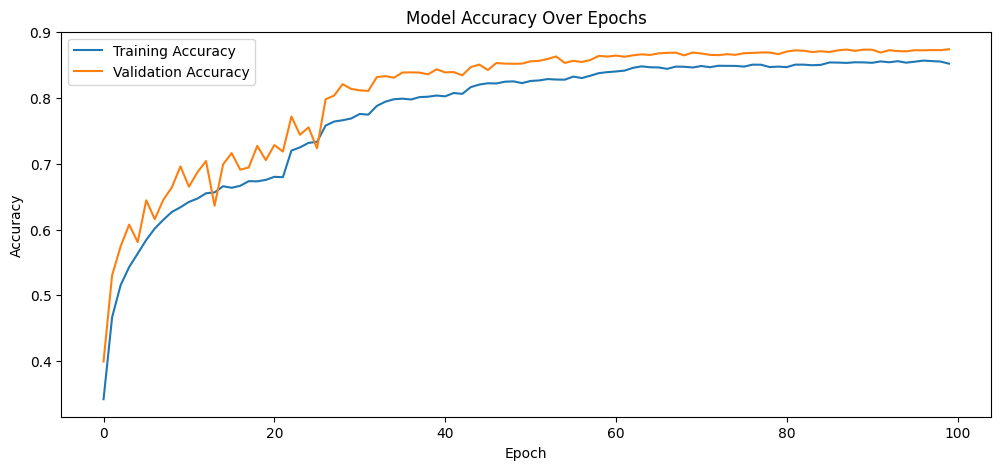

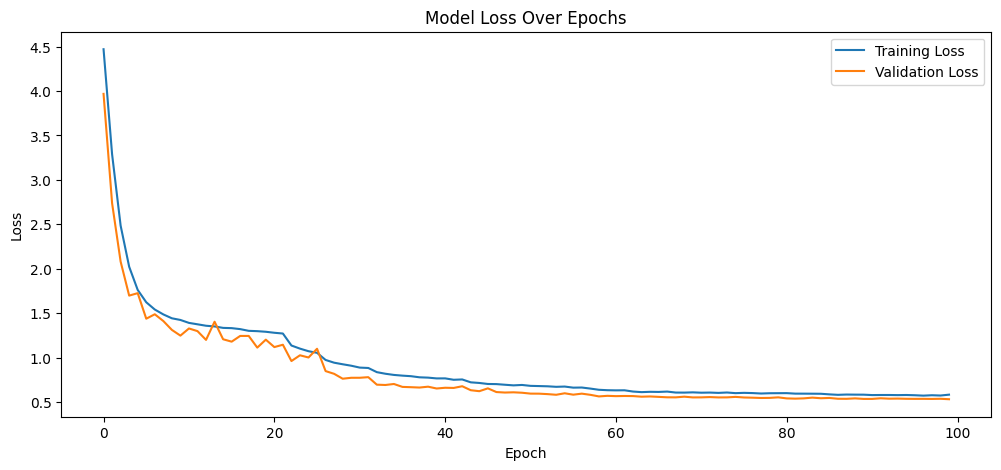

In [9]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
inp = Input(shape=(32,32,3), name="emb_in")

x = inp
for layer in model.layers:
    x = layer(x)
    if layer.name == "embedding":
        break

emb_model = Model(inputs=inp, outputs=x, name="embed_extractor")

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


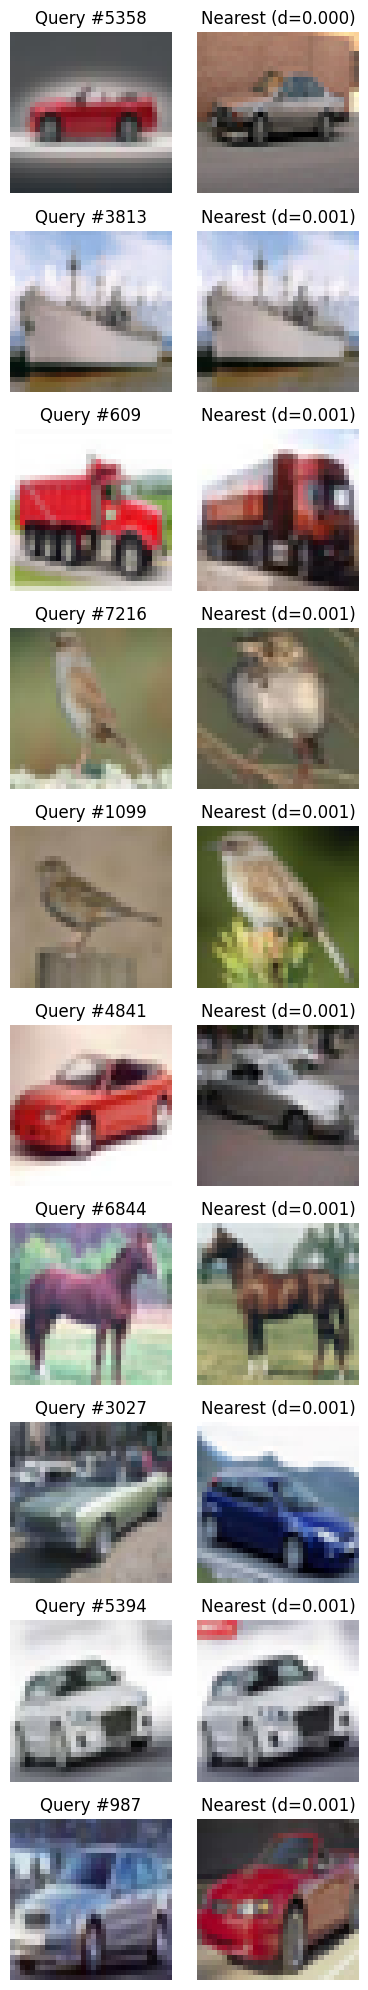

In [25]:
embeddings = emb_model.predict(x_test, batch_size=256)
normalized_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
pca = PCA(n_components=0.95, whiten=True)
reduced = pca.fit_transform(normalized_embeddings)
nbrs = NearestNeighbors(n_neighbors=2, metric='cosine').fit(reduced)
distances, indices = nbrs.kneighbors(reduced)

nearest_idx  = indices[:, 1]
nearest_dist = distances[:, 1]

triples = [(i, nearest_idx[i], nearest_dist[i])
           for i in range(len(nearest_idx))]
triples.sort(key=lambda t: t[2])
used  = set()
pairs = []

for i, j, d in triples:
    if i not in used and j not in used:
        pairs.append((i, j, d))
        used.update([i, j])
    if len(pairs) == 10:
        break

fig, axes = plt.subplots(10, 2, figsize=(4, 20))
for row, (i, j, d) in enumerate(pairs[:10]):
    axes[row, 0].imshow(x_test[i])
    axes[row, 0].set_title(f"Query #{i}")
    axes[row, 1].imshow(x_test[j])
    axes[row, 1].set_title(f"Nearest (d={d:.3f})")
    axes[row, 0].axis('off')
    axes[row, 1].axis('off')


plt.tight_layout()
plt.show()

